**Electric Vehicle Market Segmentation**

**Sweta Patil**

**Data set1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings


In [ ]:
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

In [ ]:
data_smev = pd.read_excel("smev_data.xlsx", sheet_name=None)

In [ ]:
data_smev.keys()

dict_keys(['EV 2W FY 19-20', 'EV 2W FY 20-21', 'EV 2W FY 21-22', 'EV 2W FY 22-23', 'EV Market', 'Electric Bus Sales', 'Electric 4-Wheeler Sales', 'Electric 3-Wheeler Sales', 'Electric 2-Wheeler Sales', 'EV Industries'])

In [ ]:
data_smev['EV Industries']

,category,financial_year,num_vehicles
0,E-2 Wheelers,2017-18,1981
1,E-2 Wheelers,2018-19,27478
2,E-2 Wheelers,2019-20,26512
3,E-2 Wheelers,2020-21,44294
4,E-2 Wheelers,2021-22,249615
5,E-2 Wheelers,2022-23,728090
6,E-3 Wheelers,2017-18,91970
7,E-3 Wheelers,2018-19,116031
8,E-3 Wheelers,2019-20,143051
9,E-3 Wheelers,2020-21,90898


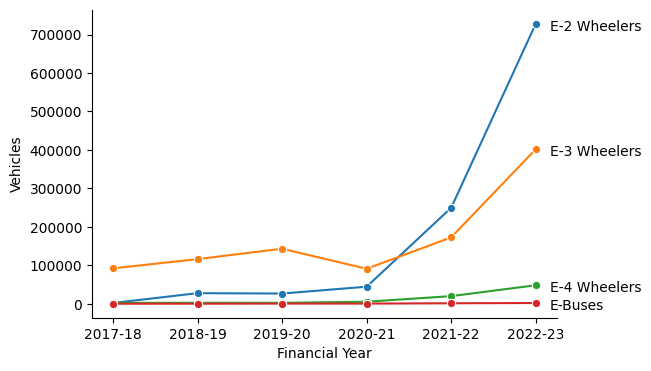

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.lineplot(data=data_smev['EV Industries'], x='financial_year', y='num_vehicles', hue='category', marker='o', palette='tab10')
plt.xlabel("Financial Year")
plt.ylabel("Vehicles")
plt.legend(title='Category')

# Annotate the last data point
for col in data_smev['EV Industries']['category'].unique():
    last_point = data_smev['EV Industries'][data_smev['EV Industries']['category'] == col].iloc[-1]
    plt.annotate(f"{last_point['category']}",
                 (last_point['financial_year'], last_point['num_vehicles']),
                 textcoords="offset points",
                 xytext=(10, -5),
                 ha='left')
ax.spines[['right', 'top']].set_visible(False)
ax.get_legend().set_visible(False)
plt.show()

In [ ]:
data_smev['EV Market'] = data_smev['EV Market'].sort_values('Amount INR Cr', ascending = False)

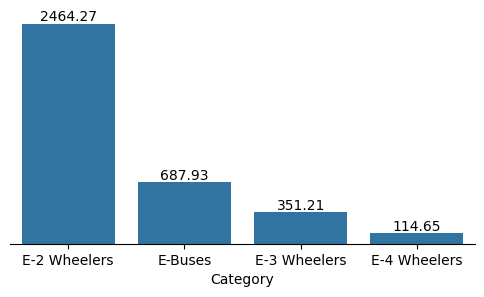

In [ ]:
fig, ax = plt.subplots(figsize = (6, 3))
ax = sns.barplot(data_smev['EV Market'], x = 'Category', y = 'Amount INR Cr')
ax.bar_label(ax.containers[0])
plt.yticks([])
plt.ylabel("")
ax.spines[['right', 'top', 'left']].set_visible(False)
plt.show()

In [ ]:
ev2w = list(data_smev.keys())[0:4]
data_ev2w = pd.concat([data_smev[ev2w[0]], data_smev[ev2w[1]], data_smev[ev2w[2]], data_smev[ev2w[3]]])

In [ ]:
data_ev2w['maker'] = data_ev2w['maker'].str.upper()

In [ ]:
np.sort(data_ev2w['maker'].unique())

array(['AMPERE', 'AMPERE VEHICLES', 'ATHER', 'ATHER ENERGY', 'BAJAJ',
       'BEING INDIA', 'BENLING', 'HERO ELECTRIC', 'JITENDRA',
       'JITENDRA NEW EV', 'OKAYA EV', 'OKINAWA', 'OKINAWA AUTOTECH',
       'OLA ELECTRIC', 'OTHERS', 'PURE EV', 'REVOLT', 'TVS'], dtype=object)

In [ ]:
data_ev2w['maker'] = data_ev2w['maker'].replace('AMPERE VEHICLES', 'AMPERE').replace('ATHER ENERGY', 'ATHER').replace('BEING INDIA', 'BENLING').replace('JITENDRA NEW EV', 'JITENDRA').replace('OKINAWA AUTOTECH', 'OKINAWA')

In [ ]:
np.sort(data_ev2w['maker'].unique())

array(['AMPERE', 'ATHER', 'BAJAJ', 'BENLING', 'HERO ELECTRIC', 'JITENDRA',
       'OKAYA EV', 'OKINAWA', 'OLA ELECTRIC', 'OTHERS', 'PURE EV',
       'REVOLT', 'TVS'], dtype=object)

In [ ]:
data_ev2w

,financial_year,maker,market_share,month,num_vehicles
0,2019-20,HERO ELECTRIC,0.30,Apr,1776
1,2019-20,HERO ELECTRIC,0.30,May,455
2,2019-20,HERO ELECTRIC,0.30,Jun,329
3,2019-20,HERO ELECTRIC,0.30,Jul,260
4,2019-20,HERO ELECTRIC,0.30,Aug,249
...,...,...,...,...,...
151,2022-23,OTHERS,0.08,Nov,5241
152,2022-23,OTHERS,0.08,Dec,5233
153,2022-23,OTHERS,0.08,Jan,5111
154,2022-23,OTHERS,0.08,Feb,5083
